In [85]:
#importing dataset

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import os
from sklearn.linear_model import PassiveAggressiveClassifier

In [87]:
#uploading dataset

In [88]:
df = pd.read_csv(r'dataset\data.csv')

In [89]:
df.head()


,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor
0,1,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,...,0.383773,2.649801,1.213344,1.409218,2.962484,Ok,Ok,Clean,Clean,Stable
1,2,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,...,0.450954,2.669423,1.210674,1.379050,2.938135,Ok,Ok,Clean,Clean,Stable
2,3,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,...,0.443924,2.772009,1.210612,1.373490,2.991878,Ok,Ok,Clean,Clean,Stable
3,4,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,...,0.370457,2.876056,1.213223,1.443234,3.096158,Ok,Ok,Clean,Clean,Stable
4,5,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,...,0.383868,2.849451,1.209216,1.405190,3.059417,Ok,Ok,Clean,Clean,Stable


In [90]:
#data analysis

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
id                     1000 non-null int64
rpm                    1000 non-null int64
motor_power            1000 non-null float64
torque                 1000 non-null float64
outlet_pressure_bar    1000 non-null float64
air_flow               1000 non-null float64
noise_db               1000 non-null float64
outlet_temp            1000 non-null float64
wpump_outlet_press     1000 non-null float64
water_inlet_temp       1000 non-null float64
water_outlet_temp      1000 non-null float64
wpump_power            1000 non-null float64
water_flow             1000 non-null float64
oilpump_power          1000 non-null float64
oil_tank_temp          1000 non-null float64
gaccx                  1000 non-null float64
gaccy                  1000 non-null float64
gaccz                  1000 non-null float64
haccx                  1000 non-null float64
haccy                  1000 non-null float6

In [92]:
df.describe()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,wpump_power,water_flow,oilpump_power,oil_tank_temp,gaccx,gaccy,gaccz,haccx,haccy,haccz
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1499.516000,6984.877371,49.186120,4.054049,754.673930,53.412121,118.855110,2.799610,83.021711,...,222.185445,53.708176,300.484123,46.237663,0.601789,0.349667,3.923073,1.101253,1.350042,3.495037
std,288.819436,707.681915,4269.277571,18.706750,1.862761,442.743491,8.055363,19.120181,0.455274,18.644992,...,3.774537,6.587259,0.408703,0.196139,0.058719,0.040667,1.610130,0.058546,0.040871,0.817667
min,1.000000,480.000000,1402.424603,13.222197,1.000000,95.098952,39.879017,76.902822,1.834533,43.166392,...,213.525207,38.570791,299.507859,45.806178,0.540045,0.274650,1.730301,1.039910,1.270696,2.329267
25%,250.750000,988.750000,3559.437042,33.749857,2.443750,305.388152,46.490976,104.731080,2.448208,68.914714,...,219.471768,50.459245,300.187873,46.090060,0.558092,0.316543,2.576739,1.057717,1.318785,2.802622
50%,500.500000,1500.000000,5906.662534,48.890905,4.038000,608.626411,52.708480,118.275842,2.780492,82.101660,...,221.889622,58.112667,300.470013,46.236213,0.576814,0.349343,3.610639,1.075392,1.348189,3.339698
75%,750.250000,2010.000000,9636.002782,63.672921,5.600250,1193.266273,60.158248,132.850790,3.092101,95.792346,...,224.721620,58.552897,300.774788,46.378237,0.615021,0.375261,5.081960,1.113696,1.375232,4.071874
max,1000.000000,2520.000000,19454.559080,93.540405,8.664000,1539.911634,74.401986,172.711382,4.295136,137.543531,...,235.342910,59.174992,301.435483,46.755690,0.726604,0.459811,9.209166,1.227134,1.461809,6.107852


In [93]:
#data Correlection

In [94]:
df.corr()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,wpump_power,water_flow,oilpump_power,oil_tank_temp,gaccx,gaccy,gaccz,haccx,haccy,haccz
id,1.000000,0.979739,0.695477,-0.196620,0.045409,0.701002,0.874457,0.801657,0.502637,0.786174,...,0.703770,-0.153971,-0.045803,0.790499,-0.876764,-0.600625,-0.134731,-0.873139,-0.611044,-0.187413
rpm,0.979739,1.000000,0.683017,-0.242899,0.001662,0.802732,0.913105,0.768145,0.481629,0.755047,...,0.676328,-0.085961,-0.037622,0.757987,-0.894781,-0.616205,-0.179423,-0.891603,-0.620654,-0.232459
motor_power,0.695477,0.683017,1.000000,0.470723,0.664110,0.534307,0.704704,0.845513,0.534411,0.831770,...,0.748469,-0.076706,-0.062722,0.837560,-0.597723,-0.395476,0.512376,-0.597088,-0.411050,0.466881
torque,-0.196620,-0.242899,0.470723,1.000000,0.960135,-0.213621,-0.099417,0.281177,0.170060,0.273886,...,0.260814,0.006273,-0.030795,0.280552,0.290096,0.223276,0.973283,0.285473,0.211779,0.975987
outlet_pressure_bar,0.045409,0.001662,0.664110,0.960135,1.000000,-0.020618,0.128396,0.486638,0.306907,0.475584,...,0.436965,-0.022723,-0.046871,0.483254,0.023339,0.039018,0.957529,0.018475,0.022523,0.943720
air_flow,0.701002,0.802732,0.534307,-0.213621,-0.020618,1.000000,0.796344,0.657010,0.414282,0.648742,...,0.589553,-0.174149,-0.024626,0.648717,-0.717076,-0.503371,-0.164151,-0.716448,-0.496423,-0.206279
noise_db,0.874457,0.913105,0.704704,-0.099417,0.128396,0.796344,1.000000,0.706147,0.442434,0.693313,...,0.634585,0.049035,-0.037698,0.699607,-0.815049,-0.562943,-0.037175,-0.812995,-0.554468,-0.087204
outlet_temp,0.801657,0.768145,0.845513,0.281177,0.486638,0.657010,0.706147,1.000000,0.626032,0.976431,...,0.870768,-0.463249,-0.069406,0.983364,-0.667847,-0.459027,0.326168,-0.666338,-0.472741,0.279155
wpump_outlet_press,0.502637,0.481629,0.534411,0.170060,0.306907,0.414282,0.442434,0.626032,1.000000,0.620936,...,0.555003,-0.290385,-0.017471,0.623503,-0.438180,-0.280740,0.208955,-0.435587,-0.349302,0.176993
water_inlet_temp,0.786174,0.755047,0.831770,0.273886,0.475584,0.648742,0.693313,0.976431,0.620936,1.000000,...,0.859033,-0.459341,-0.072715,0.966289,-0.655852,-0.448706,0.316110,-0.654230,-0.465985,0.269937


In [95]:
#Checking NULL values

In [96]:
df.isnull().sum()

id                     0
rpm                    0
motor_power            0
torque                 0
outlet_pressure_bar    0
air_flow               0
noise_db               0
outlet_temp            0
wpump_outlet_press     0
water_inlet_temp       0
water_outlet_temp      0
wpump_power            0
water_flow             0
oilpump_power          0
oil_tank_temp          0
gaccx                  0
gaccy                  0
gaccz                  0
haccx                  0
haccy                  0
haccz                  0
bearings               0
wpump                  0
radiator               0
exvalve                0
acmotor                0
dtype: int64

In [97]:
df = df.drop(['id'], axis = 1)
df

,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,water_outlet_temp,...,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor
0,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,47.259238,...,0.383773,2.649801,1.213344,1.409218,2.962484,Ok,Ok,Clean,Clean,Stable
1,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,55.025653,...,0.450954,2.669423,1.210674,1.379050,2.938135,Ok,Ok,Clean,Clean,Stable
2,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,50.505622,...,0.443924,2.772009,1.210612,1.373490,2.991878,Ok,Ok,Clean,Clean,Stable
3,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,58.706376,...,0.370457,2.876056,1.213223,1.443234,3.096158,Ok,Ok,Clean,Clean,Stable
4,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,54.046362,...,0.383868,2.849451,1.209216,1.405190,3.059417,Ok,Ok,Clean,Clean,Stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2485,18141.242510,72.206554,6.938,470.274717,66.714857,145.634454,3.667832,105.736827,123.061075,...,0.351149,6.469546,1.054365,1.359977,4.734390,Ok,Ok,Clean,Dirty,Stable
996,2519,18811.531550,74.163503,7.109,476.563145,64.476072,150.506361,3.057030,101.870016,123.486346,...,0.339553,6.700342,1.056868,1.286475,4.817608,Ok,Ok,Clean,Dirty,Stable
997,2514,18784.923040,71.763552,7.113,473.831118,60.419933,148.222981,3.567040,113.542220,128.279705,...,0.334793,6.704334,1.056126,1.358090,4.856507,Ok,Ok,Clean,Dirty,Stable
998,2490,18612.827210,73.097871,7.113,468.394650,62.068962,149.739912,2.692823,116.654249,131.776696,...,0.344867,6.710383,1.051912,1.349688,4.851370,Ok,Ok,Clean,Dirty,Stable


In [98]:
Labels = ['bearings','wpump','radiator','exvalve','acmotor']

for i in Labels:
    df[i] = LabelEncoder().fit_transform(df[i])
df

,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,water_outlet_temp,...,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor
0,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,47.259238,...,0.383773,2.649801,1.213344,1.409218,2.962484,1,1,0,0,0
1,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,55.025653,...,0.450954,2.669423,1.210674,1.379050,2.938135,1,1,0,0,0
2,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,50.505622,...,0.443924,2.772009,1.210612,1.373490,2.991878,1,1,0,0,0
3,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,58.706376,...,0.370457,2.876056,1.213223,1.443234,3.096158,1,1,0,0,0
4,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,54.046362,...,0.383868,2.849451,1.209216,1.405190,3.059417,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2485,18141.242510,72.206554,6.938,470.274717,66.714857,145.634454,3.667832,105.736827,123.061075,...,0.351149,6.469546,1.054365,1.359977,4.734390,1,1,0,1,0
996,2519,18811.531550,74.163503,7.109,476.563145,64.476072,150.506361,3.057030,101.870016,123.486346,...,0.339553,6.700342,1.056868,1.286475,4.817608,1,1,0,1,0
997,2514,18784.923040,71.763552,7.113,473.831118,60.419933,148.222981,3.567040,113.542220,128.279705,...,0.334793,6.704334,1.056126,1.358090,4.856507,1,1,0,1,0
998,2490,18612.827210,73.097871,7.113,468.394650,62.068962,149.739912,2.692823,116.654249,131.776696,...,0.344867,6.710383,1.051912,1.349688,4.851370,1,1,0,1,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
rpm                    1000 non-null int64
motor_power            1000 non-null float64
torque                 1000 non-null float64
outlet_pressure_bar    1000 non-null float64
air_flow               1000 non-null float64
noise_db               1000 non-null float64
outlet_temp            1000 non-null float64
wpump_outlet_press     1000 non-null float64
water_inlet_temp       1000 non-null float64
water_outlet_temp      1000 non-null float64
wpump_power            1000 non-null float64
water_flow             1000 non-null float64
oilpump_power          1000 non-null float64
oil_tank_temp          1000 non-null float64
gaccx                  1000 non-null float64
gaccy                  1000 non-null float64
gaccz                  1000 non-null float64
haccx                  1000 non-null float64
haccy                  1000 non-null float64
haccz                  1000 non-null floa

In [100]:
labels = ['Clean','Dirty']
labels

['Clean', 'Dirty']

In [101]:
#Data Visulazation

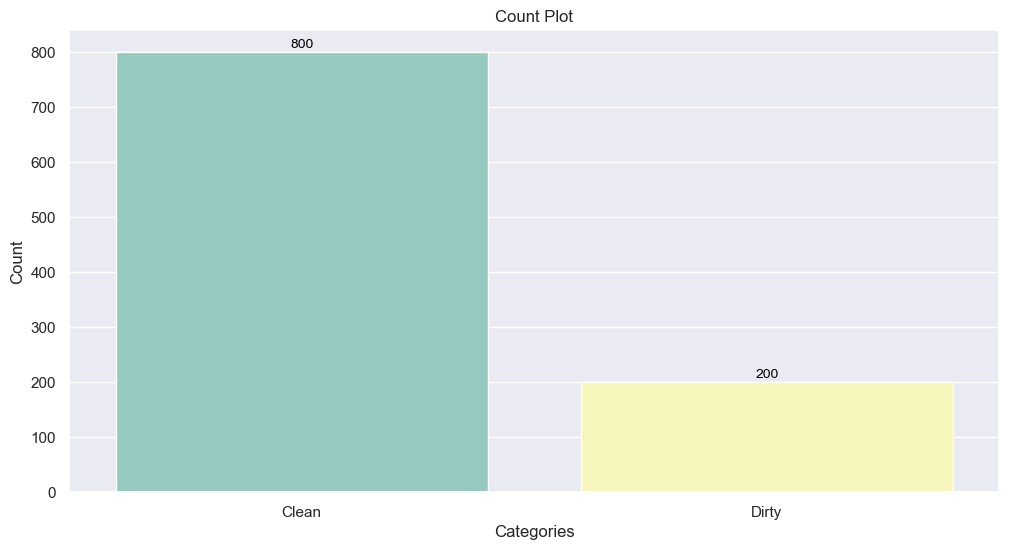

In [102]:
sns.set(style="darkgrid") 
plt.figure(figsize=(12, 6)) 
ax = sns.countplot(x=df['radiator'], data=df, palette="Set3")
plt.title("Count Plot")  
plt.xlabel("Categories") 
plt.ylabel("Count") 

ax.set_xticklabels(labels)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  

In [103]:
#Declaring independent and dependent variable

In [104]:
x = df.drop(['radiator'],axis = 1)
x.head()

,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,water_outlet_temp,...,gaccx,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,exvalve,acmotor
0,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,47.259238,...,0.711820,0.383773,2.649801,1.213344,1.409218,2.962484,1,1,0,0
1,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,55.025653,...,0.704667,0.450954,2.669423,1.210674,1.379050,2.938135,1,1,0,0
2,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,50.505622,...,0.704828,0.443924,2.772009,1.210612,1.373490,2.991878,1,1,0,0
3,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,58.706376,...,0.726604,0.370457,2.876056,1.213223,1.443234,3.096158,1,1,0,0
4,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,54.046362,...,0.707785,0.383868,2.849451,1.209216,1.405190,3.059417,1,1,0,0


In [105]:
y = df['radiator']
y

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: radiator, Length: 1000, dtype: int32

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.10, random_state = 42)

In [107]:
x_train.shape

(900, 24)

In [108]:
y_train.shape

(900,)

In [109]:
#performance evalution

In [110]:
precision = []
recall = []
fscore = []
accuracy = []


def performance_metrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

In [111]:
# Passive Aggressive Classifier model building

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PassiveAggressiveClassifier Accuracy    : 81.0
PassiveAggressiveClassifier Precision   : 40.5
PassiveAggressiveClassifier Recall      : 50.0
PassiveAggressiveClassifier FSCORE      : 44.751381215469614

 PassiveAggressiveClassifier classification report
               precision    recall  f1-score   support

       Clean       1.00      0.81      0.90       100
       Dirty       0.00      0.00      0.00         0

    accuracy                           0.81       100
   macro avg       0.50      0.41      0.45       100
weighted avg       1.00      0.81      0.90       100



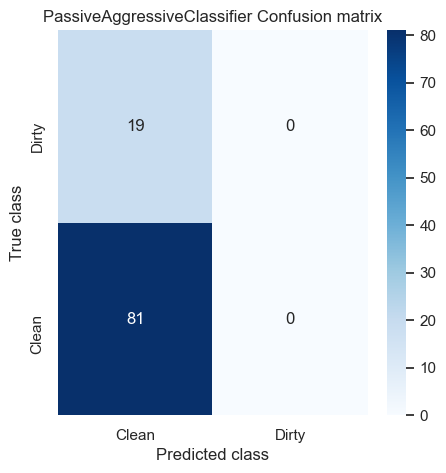

In [112]:
pa_model_path = 'model/PassiveAggressiveClassifier.npy'
if os.path.exists(pa_model_path):
    # Load the Passive Aggressive Classifier model
    pa_classifier = np.load(pa_model_path, allow_pickle=True).item()
else:                       
    # Train and save the Passive Aggressive Classifier model
    pa_classifier = PassiveAggressiveClassifier()
    pa_classifier.fit(x_train, y_train)
    np.save(pa_model_path, pa_classifier)

# Predict using the trained Passive Aggressive Classifier model
y_pred_pa = pa_classifier.predict(x_test)

# Evaluate the Passive Aggressive Classifier model
performance_metrics('PassiveAggressiveClassifier', y_pred_pa, y_test)

In [113]:
#Decision Tree Classifier model building

DecisionTreeClassifier Accuracy    : 100.0
DecisionTreeClassifier Precision   : 100.0
DecisionTreeClassifier Recall      : 100.0
DecisionTreeClassifier FSCORE      : 100.0

 DecisionTreeClassifier classification report
               precision    recall  f1-score   support

       Clean       1.00      1.00      1.00        81
       Dirty       1.00      1.00      1.00        19

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



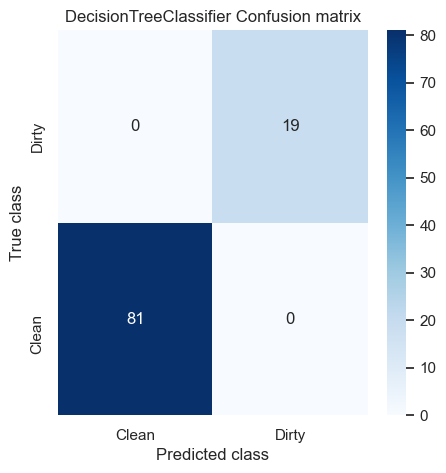

In [114]:
from sklearn.tree import DecisionTreeClassifier

# Check if the model file exists
model_path = 'model/DecisionTreeClassifier.npy'
if os.path.exists(model_path):
    # Load the model
    classifier = np.load(model_path, allow_pickle=True).item()
else:                       
    # Train and save the model
    classifier = DecisionTreeClassifier()
    classifier.fit(x_train, y_train)
    np.save(model_path, classifier)

# Predict using the trained model
y_pred = classifier.predict(x_test)

# Evaluate the model
performance_metrics('DecisionTreeClassifier', y_pred, y_test)

In [115]:
#Tabular form of Performance Metrics

In [116]:
#showing all algorithms performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["Passive Aggressive Classifier", "Decision Tree Classifier"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,Passive Aggressive Classifier,40.5,50.0,44.751381,81.0
1,Decision Tree Classifier,100.0,100.0,100.000000,100.0


In [117]:
#Uploading testing dataset

In [118]:
test=pd.read_csv("test.csv")
test

,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,water_outlet_temp,...,gaccx,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,exvalve,acmotor
0,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,47.259238,...,0.711820,0.383773,2.649801,1.213344,1.409218,2.962484,Ok,Ok,Clean,Stable
1,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,55.025653,...,0.704667,0.450954,2.669423,1.210674,1.379050,2.938135,Ok,Ok,Clean,Stable
2,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,50.505622,...,0.704828,0.443924,2.772009,1.210612,1.373490,2.991878,Ok,Ok,Clean,Stable
3,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,58.706376,...,0.726604,0.370457,2.876056,1.213223,1.443234,3.096158,Ok,Ok,Clean,Stable
4,510,1410.236643,26.618685,1.000,269.626385,41.006835,96.963186,2.623326,63.241520,69.367624,...,0.704814,0.401907,2.633753,1.201563,1.406859,2.942446,Ok,Ok,Clean,Stable
5,495,1430.354301,31.752809,1.067,269.576150,40.468152,93.551169,2.581863,57.639074,68.735309,...,0.706136,0.380500,2.667292,1.219501,1.378712,2.962104,Ok,Ok,Clean,Stable
6,483,1508.856559,32.994530,1.254,269.525914,40.359634,97.521093,2.034126,59.287207,77.734955,...,0.726136,0.396433,2.753774,1.226091,1.448649,3.037134,Ok,Ok,Clean,Stable
7,517,1718.998582,32.296833,1.573,268.983533,40.991904,101.070001,2.136516,64.689133,72.755483,...,0.707105,0.451994,2.794185,1.203420,1.365582,2.988531,Ok,Ok,Clean,Stable
8,480,1795.164275,37.608349,1.852,268.327808,41.016844,100.280155,2.115461,62.971002,76.824068,...,0.717596,0.431367,2.959266,1.225643,1.434447,3.126604,Ok,Ok,Clean,Stable


In [119]:
Test_Labels = ['bearings','wpump','exvalve','acmotor']

for i in Test_Labels:
    test[i] = LabelEncoder().fit_transform(test[i])
test

,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,water_outlet_temp,...,gaccx,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,exvalve,acmotor
0,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,47.259238,...,0.711820,0.383773,2.649801,1.213344,1.409218,2.962484,0,0,0,0
1,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,55.025653,...,0.704667,0.450954,2.669423,1.210674,1.379050,2.938135,0,0,0,0
2,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,50.505622,...,0.704828,0.443924,2.772009,1.210612,1.373490,2.991878,0,0,0,0
3,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,58.706376,...,0.726604,0.370457,2.876056,1.213223,1.443234,3.096158,0,0,0,0
4,510,1410.236643,26.618685,1.000,269.626385,41.006835,96.963186,2.623326,63.241520,69.367624,...,0.704814,0.401907,2.633753,1.201563,1.406859,2.942446,0,0,0,0
5,495,1430.354301,31.752809,1.067,269.576150,40.468152,93.551169,2.581863,57.639074,68.735309,...,0.706136,0.380500,2.667292,1.219501,1.378712,2.962104,0,0,0,0
6,483,1508.856559,32.994530,1.254,269.525914,40.359634,97.521093,2.034126,59.287207,77.734955,...,0.726136,0.396433,2.753774,1.226091,1.448649,3.037134,0,0,0,0
7,517,1718.998582,32.296833,1.573,268.983533,40.991904,101.070001,2.136516,64.689133,72.755483,...,0.707105,0.451994,2.794185,1.203420,1.365582,2.988531,0,0,0,0
8,480,1795.164275,37.608349,1.852,268.327808,41.016844,100.280155,2.115461,62.971002,76.824068,...,0.717596,0.431367,2.959266,1.225643,1.434447,3.126604,0,0,0,0


In [120]:
#Model prediction on test data

In [121]:
predict = classifier.predict(test)

for i, p in enumerate(predict):
    if p == 0:
        print(test.iloc[i]) 
        print("Model Predicted of Row {} Test Data is--->".format(i),labels[0])
    elif p == 1:
        print(test.iloc[i])  
        print("Model Predicted of Row {} Test Data is--->".format(i),labels[1])
        

rpm                     499.000000
motor_power            1405.842858
torque                   27.511708
outlet_pressure_bar       1.000000
air_flow                308.289879
noise_db                 40.840517
outlet_temp              78.554715
wpump_outlet_press        2.960632
water_inlet_temp         43.166392
water_outlet_temp        47.259238
wpump_power             216.610506
water_flow               59.085059
oilpump_power           300.372921
oil_tank_temp            45.806178
gaccx                     0.711820
gaccy                     0.383773
gaccz                     2.649801
haccx                     1.213344
haccy                     1.409218
haccz                     2.962484
bearings                  0.000000
wpump                     0.000000
exvalve                   0.000000
acmotor                   0.000000
Name: 0, dtype: float64
Model Predicted of Row 0 Test Data is---> Clean
rpm                     513.000000
motor_power            1457.370092
torque            